<a href="https://colab.research.google.com/github/miamvmian/SciML/blob/main/%5BSOLVED%5D_Seminar_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/adasegroup/ML2022_seminars/blob/master/seminar10/artificial_neural_networks_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar 9: Artificial neural networks, MLP, PyTorch
Machine Learning by professor Evgeny Burnaev

In this seminar we will get familiar with artificial neural networks and one of the most common frameworks to work with them --- PyTorch.
Our humble ultimate goal will be to program and train an MLP to classify MNIST digits.

![](https://github.com/adasegroup/ML2020_seminars/raw/master/seminar12/img/pic1.png)

In [ ]:
from IPython.display import clear_output, display
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from tqdm.auto import trange

## 1. Intro

An artificial neural network --- ANN or just NN, is simply a composition of functions with free 'trainable' parameters, or 'weights'.
In this seminar, we will be talking about NNs that are feedforward, i.e don't have cyclic compositions of the functions,
and we will be talking about them in the context of approximation tasks.

More formally, for any functions $f_i$
$$ f_1(x|w_1),\quad f_2(x, f_1(x)|w_2),\quad f_n(x, f_1(x), \ldots, f_{n-1}(\ldots)|w_n),$$
$F(x) = f_n(\ldots)$ is a feedforward neural network with weights $w_1,\ldots,w_n$,
and we will want it to approximate something, e.g another function.

For instance, let's say that we want to find a linear fit to this:

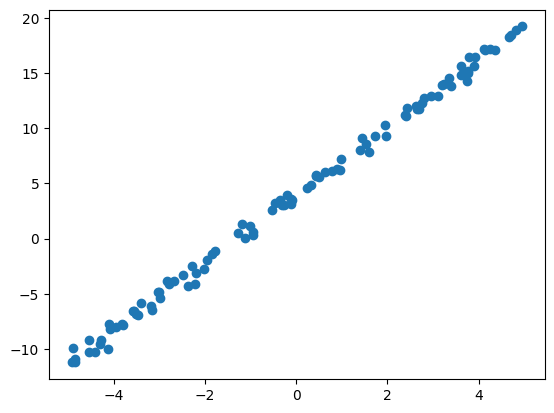

In [ ]:
points_n = 100
x = np.random.rand(points_n) * 10 - 5
y = x * 3 + 4
y += np.random.randn(points_n) / 2
plt.scatter(x, y)

We can call function $F(x) = ax + b$ a neural network with weights $a$ and $b$, and train this neural network, which means find such values of $a$ and $b$ that $F(x)$ fits the data above.

NNs are trained with backpropagation algorithm, which is basically
1. Calculate the value of the loss function, that represents how far from desired the output of the network is
2. Calculate the derivative of the loss w.r.t to each trainable parameter of the network
3. Update the values of the parameters with some rule using these derivatives
4. Repeat steps 1-3 for N iterations, or until the loss is low enough, or something else

### Exercise 1.
Train $F(x) = ax + b$ to fit the data above. Use plain Python or NumPy, not PyTorch.

More formally, we have $x_i,\,y_i,\,i=1,\ldots,n_\mathrm{pts}$
1. Use mean squared error as the loss function $L(a, b) = \frac{1}{n_\mathrm{pts}}\sum_i (F(x_i | a, b) - y_i)^2$
2. Calculate the derivatives of the loss w.r.t to $a$ and $b$
3. Update the weights of the network using Gradient Descent
$$ a_\mathrm{new} = a_\mathrm{old} - \lambda\partial_a L(a_\mathrm{old}, b_\mathrm{old}),\quad b_\mathrm{new} = b_\mathrm{old} - \lambda\partial_b L(a_\mathrm{old}, b_\mathrm{old}), $$
where $\lambda$ is a numerical paramer called "learning rate"
4. Repeat steps 1-3 until you are satisfied with the result

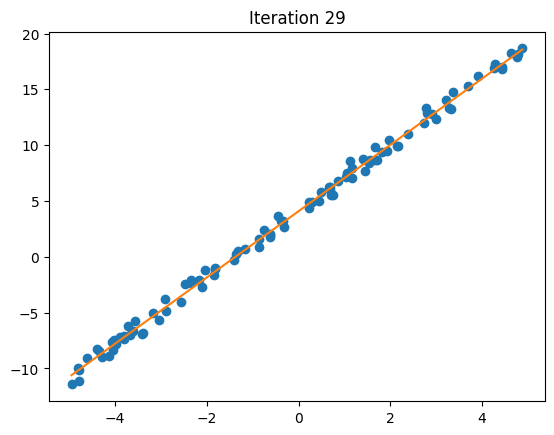

In [ ]:
# generate the data again
np.random.seed(0)
points_n = 100
x = np.random.rand(points_n) * 10 - 5
x.sort()  # sort points, merely for correct visualization
y = x * 3 + 4
y += np.random.randn(points_n) / 2

# define the network and initial values of the parameters
a = 1
b = 2

def f(x):
    return x * a + b

# visualization code
fig = plt.figure()

def visualize(fig, x, y, nn_outputs):
    fig.clear()
    plt.title(f'Iteration {iter_i}')
    plt.scatter(x, y, c='tab:blue')
    plt.plot(x, nn_outputs, c='tab:orange')
    clear_output(wait=True)
    display(fig)

# train
learning_rate = 1e-1
iterations_n = 30

for iter_i in range(iterations_n):
    nn_outputs = f(x)

    # calculate the derivatives
    dl_a = 2. / points_n * np.sum((nn_outputs - y) * x)
    dl_b = 2. / points_n * np.sum((nn_outputs - y) * 1)

    # update the parameters
    a = a - dl_a * learning_rate
    b = b - dl_b * learning_rate

    visualize(fig, x, y, nn_outputs)
plt.close()

### Exercise 2.
Now try to fit this

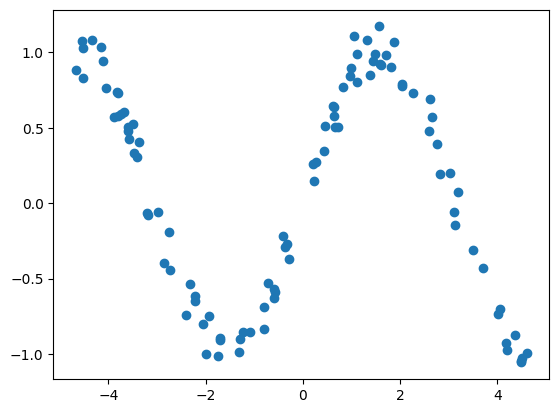

In [ ]:
np.random.seed(0)
points_n = 100
x = np.random.rand(points_n) * np.pi*3 - np.pi*1.5
x.sort()
y = np.sin(x)
y += np.random.randn(points_n) / 10
plt.scatter(x, y)

with a bit more complex function $F(x) = f_3(f_2(f_1(x)))$

$$f_1(x) = \mathbf{a}_1\,x + \mathbf{b}_1,\quad \mathbf{a}_1,\,\mathbf{b}_1\in\mathbb{R}^{80}, \\
f_2(\mathbf{x})_i = \max(0, x_i),\quad i = 1, \ldots, 80, \\
f_3(\mathbf{x}) = \mathbf{a}_2\cdot\mathbf{x} + b_2,\quad \mathbf{a}_2\in\mathbb{R}^{80},\,b_2\in\mathbb{R}.
$$

The training algorithm is the same, the main difference is calculation of derivatives.

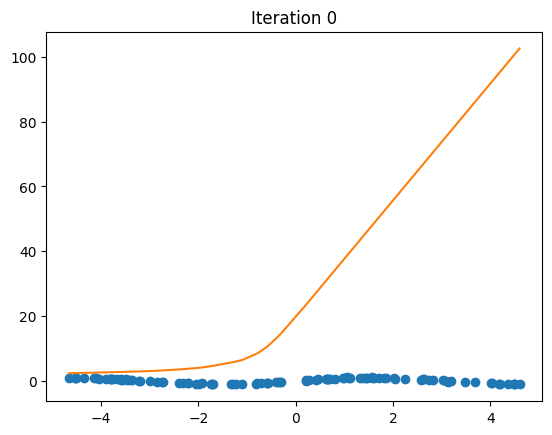

In [ ]:
# define the network and initial values of the parameters
a1 = np.random.rand(80)
b1 = np.random.rand(80)
a2 = np.random.rand(80)
b2 = 1

def f(x):
    f1_out = x[..., None] * a1 + b1  # [points_n, 80]
    f2_out = np.maximum(f1_out, 0)
    f3_out = np.matmul(f2_out, a2) + b2
    return f3_out

# train
learning_rate = 1e-3
iterations_n = 1

fig = plt.figure()

for iter_i in range(iterations_n):
    nn_outputs = f(x)

    # calculate the derivatives
    # Your code here

    # update the parameters
    # Your code here

    if iter_i % 100 == 0:
        visualize(fig, x, y, nn_outputs)
plt.close()

Not that easy, right?

The key here is to use chain rule for calculation of gradients
$$\frac{\partial L}{\partial \mathbf{a}_1} = \sum_i \frac{\partial L}{\partial F(x_i)} \frac{\partial F(x_i)}{\partial \mathbf{a}_1},\quad
\frac{\partial F(x_i)}{\partial \mathbf{a}_1} = \frac{\partial F(x_i)}{\partial f_3(x_i)}\frac{\partial f_3(x_i)}{\partial f_2(x_i)}\frac{\partial f_2(x_i)}{\partial f_1(x_i)}\frac{\partial f_1(x_i)}{\partial \mathbf{a}_1},\quad \text{etc},$$
where
$$L = \frac{1}{n_\mathrm{pts}}\sum_i (F(x_i) - y_i)^2,\\
F(x) = f_3(f_2(f_1(x))).$$

The neural networks used for real-world tasks are composed of many more functions, and manually programming this each time would be impractical.
Deep learning framewors like PyTorch provide a lot of preprogrammed functionality like this.

Let's look at how we can use PyTorch to solve Exercise 2.

### Plan of the seminar
1. Intro to the seminar
2. Intro to PyTorch
3. Automatic differentiation in PyTorch
4. PyTorch Modules
5. Batching
6. Optimization
7. Putting everything together
8. Classifying MNIST with PyTorch

## 2. Intro to PyTorch

PyTorch is mostly like NumPy.

In [ ]:
# in numpy
a = np.random.rand(100)
b = np.empty(100)

np.maximum(a, np.array([0.]))
np.matmul(a, b)

np.asarray([1,2,3]).astype(np.float32)

# in pytorch
a = torch.rand(100)
b = torch.empty(100)

torch.max(a, torch.tensor([0.]))
torch.matmul(a, b)

torch.as_tensor([1,2,3]).type(torch.float32)

tensor([1., 2., 3.])

Etc.
It is useful to look through the complete list of what there is \[[1](https://pytorch.org/docs/stable/torch.html#math-operations), [2](https://pytorch.org/docs/stable/nn.functional.html)\].
For this course generally this is not necessary, but if you're going to use PyTorch for your research or the course project, there are plenty of convenient functions useful to be aware of.



A neat feature of PyTorch is that it is allows to accelerate computations using GPU transparently.

In [ ]:
m1 = np.random.rand(1000, 1000).astype(np.float32)
m2 = np.random.rand(1000, 1000).astype(np.float32)
for _ in trange(1000):
    m1 @ m2

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
m1 = torch.rand(1000, 1000, dtype=torch.float32, device='cuda')
m2 = torch.rand(1000, 1000, dtype=torch.float32, device='cuda')
for _ in trange(10_000):
    m1 @ m2

  0%|          | 0/10000 [00:00<?, ?it/s]

## 3. Automatic differentiation in PyTorch

PyTorch can automatically calculate derivatives of predefined functions and their compositions.
To indicate that we want to calculate derivative of something w.r.t some tensor, we need to set the `requires_grad` flag of this tensor to True.

In [ ]:
x = torch.tensor([1.])
x.requires_grad_()
y = torch.sin(x)

To calculate $\partial_x y(x)$ we need to call `y.backward()` (notice, not `y.backward(x)`). The value of the derivative is then stored in `x.grad`.

In [ ]:
y.backward()
print(x.grad, '==', torch.cos(x))

tensor([0.5403]) == tensor([0.5403], grad_fn=<CosBackward0>)


Same for composition of functions.

In [ ]:
x = torch.tensor([2.], requires_grad=True)
y = x ** 2 + 1
y.backward()
print(x.grad, '==', 2 * x)

tensor([4.]) == tensor([4.], grad_fn=<MulBackward0>)


Same for multivariate functions, e.g $y = \sum_i x_i a_i$

In [ ]:
x = torch.ones(10, requires_grad=True)
a = torch.arange(len(x), dtype=x.dtype)
y = torch.sum(x * a)
y.backward()

print(x.grad)
print(a)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


If a tensor already has `grad` attribute, e.g from the previous call to `backward`, subsequent calls will add to the value of this attribute.
So, if you, e.g, `backward()` in a loop, you need to explicitely set `grad` to zero each time.

In [ ]:
x = torch.tensor([1.], requires_grad=True)
x.grad is None

True

In [ ]:
a = x * 2
b = x * 3
y = a + b  # == x * 5
# in this case y.backward() is the same as
a.backward()
b.backward()
x.grad

tensor([5.])

In [ ]:
x = torch.tensor([1.], requires_grad=True)
print(x.grad is None)
a = x * 2
b = x * 3
a.backward()
print(x.grad)
b.backward()
print(x.grad)

True
tensor([2.])
tensor([5.])


In [ ]:
x = torch.tensor([1.], requires_grad=True)
for i in range(2):
    y = x * 2
    y.backward()
    print(x.grad)

tensor([2.])
tensor([4.])


In [ ]:
x = torch.tensor([1.], requires_grad=True)
for i in range(2):
    y = x * 2
    y.backward()
    print(x.grad)
    x.grad.zero_()

tensor([2.])
tensor([2.])


PyTorch tensors that don't require grad are transparently converted to numpy arrays.
To convert a tensor that requires grad, we need to call its `detach` method.

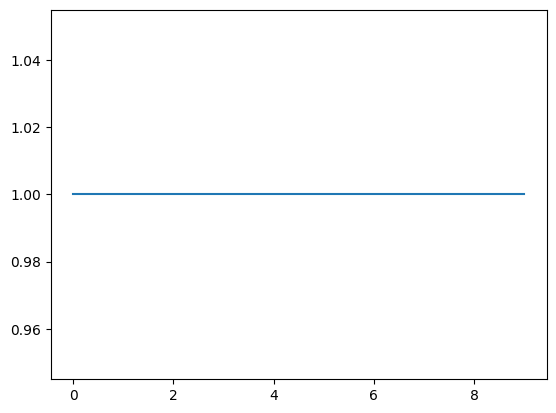

In [ ]:
x = torch.ones([10], requires_grad=True)
# plt.plot(x)  # doesn't work
plt.plot(x.detach())

## 4. PyTorch Modules

PyTorch offers a [variety of modules](https://pytorch.org/docs/stable/nn.html) representing different functions with already built-in trainable parameters.
We can implement our $f_1$, $f_2$ and $f_3$ with predefined modules, that are called [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) and [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU).

$$f_1(x) = \mathbf{a}_1\,x + \mathbf{b}_1,\quad \mathbf{a}_1,\,\mathbf{b}_1\in\mathbb{R}^{80}, \\
f_2(\mathbf{x})_i = \max(0, x_i),\quad i = 1, \ldots, 80, \\
f_3(\mathbf{x}) = \mathbf{a}_2\cdot\mathbf{x} + b_2,\quad \mathbf{a}_2\in\mathbb{R}^{80},\,b_2\in\mathbb{R}.
$$

In [ ]:
# a1 = torch.rand(80, requires_grad=True)
# b1 = torch.rand(80, requires_grad=True)
# a2 = torch.rand(80, requires_grad=True)
# b2 = torch.rand(1, requires_grad=True)
# def f(x):
#     f1_out = x[..., None] * a1 + b1
#     f2_out = torch.max(f1_out, torch.tensor([0.]))
#     f3_out = torch.matmul(f2_out, a2) + b2
#     return f3_out


f1 = torch.nn.Linear(1, 80, bias=True)
f2 = torch.nn.ReLU()
f3 = torch.nn.Linear(80, 1, bias=True)

def f(x):
    return f3(f2(f1(x)))

In [ ]:
a, b = list(f1.parameters())
a.shape, b.shape

(torch.Size([80, 1]), torch.Size([80]))

Another convenient way of stacking the modules is with [Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential)

In [ ]:
# def f(x):
#     return f3(f2(f1(x)))

f = torch.nn.Sequential(
    torch.nn.Linear(1, 80, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(80, 1, bias=True)
)
len(list(f.parameters()))

4

Another set of useful modules is [Loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions).
For Exercise 2 we will need [MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)

$$L = \frac{1}{n_\mathrm{pts}}\sum_i (F(x_i) - y_i)^2.$$

In [ ]:
loss_function = torch.nn.MSELoss()
nn_outputs = torch.ones(100) * 2
y = torch.zeros(100)
loss_function(nn_outputs, y)

tensor(4.)

## 5. Batching

The inteface of PyTorch modules allows for some batch dimensions in the input data, along which the module acts independently and in parallel.
For instance, [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) and [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) allow for any number of batch dimensions.

In [ ]:
f1 = torch.nn.Linear(1, 80, bias=True)

x = torch.rand(1)
f1(x).shape

torch.Size([80])

In [ ]:
x = torch.rand(2, 3, 5, 1)
f1(x).shape

torch.Size([2, 3, 5, 80])

(torch.Size([100]), torch.Size([100]))

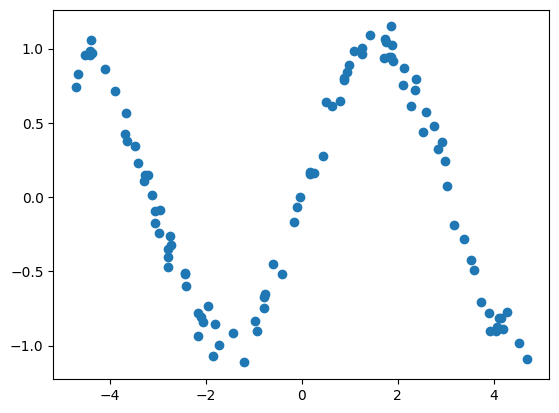

In [ ]:
# generate data
torch.manual_seed(0)
points_n = 100
x = torch.rand(points_n, dtype=torch.float32) * np.pi * 3 - np.pi * 1.5
x = x.sort()[0]
y = torch.sin(x)
y += torch.randn(points_n) / 10
plt.scatter(x, y)

x.shape, y.shape

The number of points `points_n` corresponds to the batch dimension, since we want to calculate the output of the network for each point independently

$$L = \frac{1}{n_\mathrm{pts}}\sum_i (F(x_i) - y_i)^2.$$

In [ ]:
x = x[..., None]  # add data dimension
y = y[..., None]
x.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

## 6. Optimization

PyTorch has implementions of different [optimization algorithms](https://pytorch.org/docs/stable/optim.html), or optimizers, for updating the weights of the neural network.
Today we use [Gradient Descent](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD).

The way use an optimizer is to

In [ ]:
# 1. Initialize it, setting the learning rate and the optimized parameters
optimizer = torch.optim.SGD(f.parameters(), lr=1e-3)

# 2. At each training step we need to zero the gradients of the parameters --- optimizer can do this for us
optimizer.zero_grad()

# 3. Update the parameters
optimizer.step()

## 7. Putting everything together

Let's try doing the Exercise 2 with PyTorch.

### Exercise 2.5.
Fit the data with the function $F(x) = f_3(f_2(f_1(x)))$

$$f_1(x) = \mathbf{a}_1\,x + \mathbf{b}_1,\quad \mathbf{a}_1,\,\mathbf{b}_1\in\mathbb{R}^{80}, \\
f_2(\mathbf{x})_i = \max(0, x_i),\quad i = 1, \ldots, 80, \\
f_3(\mathbf{x}) = \mathbf{a}_2\cdot\mathbf{x} + b_2,\quad \mathbf{a}_2\in\mathbb{R}^{80},\,b_2\in\mathbb{R}.
$$

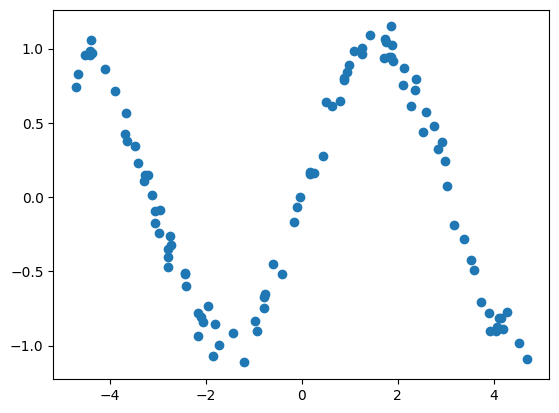

In [ ]:
torch.manual_seed(0)
points_n = 100
x = torch.rand(points_n, dtype=torch.float32) * np.pi * 3 - np.pi * 1.5
x = x.sort()[0]
y = torch.sin(x)
y += torch.randn(points_n) / 10
plt.scatter(x, y)

x = x[..., None]
y = y[..., None]

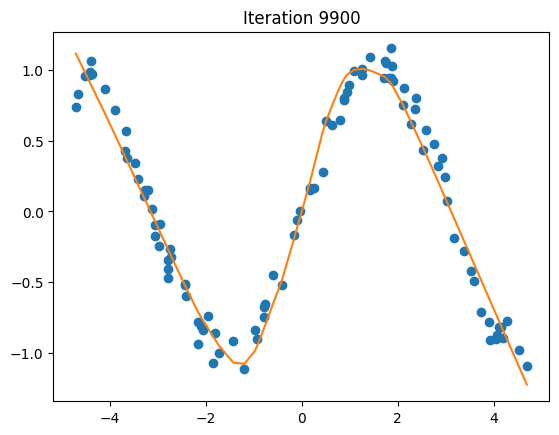

In [ ]:
hidden_dim_size = 80
net = torch.nn.Sequential(
    torch.nn.Linear(1, hidden_dim_size, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_dim_size, 1, bias=True)
)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-3)
loss_function = torch.nn.MSELoss()
fig = plt.figure()

for iter_i in range(10_000):
    nn_outputs = net(x)
    loss = loss_function(nn_outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if iter_i % 100 == 0:
        visualize(fig, x, y, nn_outputs.detach())
plt.close()

## 8. Classifying MNIST with PyTorch

MNIST is a dataset of images with handwritten digits.
Each image is labeled with the corresponding number.
We'll play around with a toy version of this dataset which has ~2k 8x8 images.

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

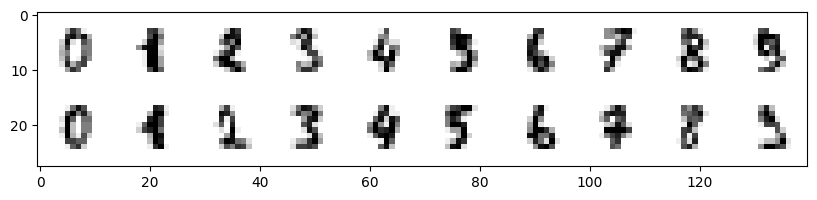

In [ ]:
images, targets = load_digits(return_X_y=True)

grid = np.pad(images[:20].reshape(20, 8, 8), [[0, 0], [3, 3], [3, 3]]).reshape(2, 10, 14, 14).swapaxes(1, 2).reshape(28, -1)
plt.figure(figsize=(10, 2))
plt.imshow(grid, cmap='gray_r')
targets[:20].reshape(2, 10)

Let's prepare the data for further work.

In [ ]:
images_train, images_test, targets_train, targets_test = train_test_split(images, targets, random_state=0)
images_train = torch.from_numpy(images_train.astype(np.float32))
images_test = torch.from_numpy(images_test.astype(np.float32))
targets_train = torch.from_numpy(targets_train)
targets_test = torch.from_numpy(targets_test)

We will unroll each image into an array of 64 values and will train our $F(x)$ from above to predict an array of 10 values, each corresponding to probability of the image depicting the respective digit.

More formally, $F(\mathbf{x}) = f_3(f_2(f_1(\mathbf{x}))),\quad \mathbf{x}\in\mathbb{R}^{64}$,
$$f_1(\mathbf{x}) = A_1\cdot \mathbf{x} + \mathbf{b}_1,\quad A_1\in\mathbb{R}^{80\times 64},\quad \mathbf{b}_1\in\mathbb{R}^{80}, \\
f_2(\mathbf{x})_i = \max(0, x_i),\quad i = 1, \ldots, 80, \\
f_3(\mathbf{x}) = A_2\cdot\mathbf{x} + \mathbf{b}_2,\quad A_2\in\mathbb{R}^{10\times 80},\,\mathbf{b}_2\in\mathbb{R}^{10}.
$$

In [ ]:
hidden_dim_size = 80
input_size = 8 * 8
number_of_classes = 10
net = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_dim_size, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_dim_size, number_of_classes, bias=True)
)

Since we want to get probablities $p_i$ of different digits out of the network,
we will pass the output of the network to softmax function
$$\mathrm{SoftMax}(\mathbf{x})_i = \frac{e^{x_i}}{\sum_j e^{x_j}}$$
to enforce the properties of probabilities,
i.e $0 \le p_i \le 1$, $\sum_i p_i = 1$.

In [ ]:
net_outputs = net(images_train[:2])
net_outputs

tensor([[ 2.6518,  0.4515,  0.9352,  0.2147,  0.4282,  0.6581, -3.6361, -1.9907,
          3.2216, -1.1466],
        [ 2.0977,  1.6607,  2.6291,  2.1919,  0.8841,  1.7786, -0.7675, -1.9802,
          1.9287, -1.2167]], grad_fn=<AddmmBackward0>)

In [ ]:
print(torch.all((0 <= net_outputs) & (net_outputs <= 1)))
print(net_outputs.sum(dim=-1))

tensor(False)
tensor([1.7878, 9.2066], grad_fn=<SumBackward1>)


In [ ]:
softmax = torch.nn.Softmax(dim=-1)
probabilities = softmax(net_outputs)

print(torch.all((0 <= probabilities) & (probabilities <= 1)))
print(probabilities.sum(dim=-1))

tensor(True)
tensor([1.0000, 1.0000], grad_fn=<SumBackward1>)


We then just take the index of maximal predicted probability

In [ ]:
max_probabilies, ids_of_max_probabilities = probabilities.max(dim=-1)
ids_of_max_probabilities

tensor([8, 2])

Instead of MSELoss, that we used for regression, we will use [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss), suitable for multi-class classification.
As the input it takes raw outputs of the network and the target class labels.

In [ ]:
loss_function = torch.nn.CrossEntropyLoss()

loss_function(net_outputs, targets_train[:2])

tensor(2.4883, grad_fn=<NllLossBackward0>)

### Exercise 3.
Let's put everything together and try to train our network.

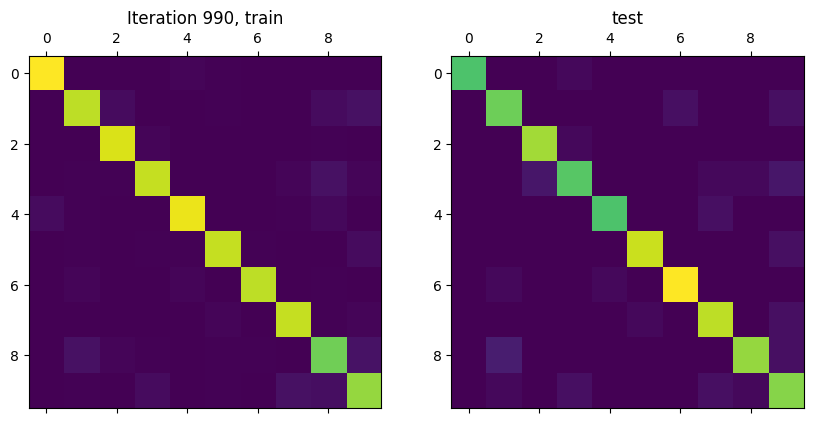

In [ ]:
# define the network
hidden_dim_size = 80
input_size = 8 * 8
number_of_classes = 10
net = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_dim_size, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_dim_size, number_of_classes, bias=True)
)

# use the same optimizer as before
optimizer = torch.optim.SGD(net.parameters(), lr=1e-3)

# use the cross entropy loss function
loss_function = torch.nn.CrossEntropyLoss()

# for monitoring we'll use confusion matrices on the train and test sets
fig, [ax_train, ax_test] = plt.subplots(1, 2, figsize=[10, 5])

def visualize():
    ax_train.clear()
    ax_train.set_title(f'Iteration {iter_i}, train')
    ax_train.matshow(confusion_matrix(targets_train, get_predicted_classes(images_train)))
    ax_test.set_title(f'test')
    ax_test.matshow(confusion_matrix(targets_test, get_predicted_classes(images_test)))
    clear_output(wait=True)
    display(fig)

def get_predicted_classes(images):
    return softmax(net(images).detach()).max(dim=-1)[1]

iters_n = 1000
for iter_i in range(iters_n):
    nn_outputs = net(images_train)
    loss = loss_function(nn_outputs, targets_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if iter_i % 10 == 0:
        visualize()
plt.close()